# Partie 1 : Equations non linéaires : méthodes itératives

#### But : calculer a tel que f(a) = 0



## 1. Setup général

In [12]:
#Import des librairies
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.optimize import fsolve

In [13]:
#Initiatlisation des variables nécessaires
x = Symbol('x')
pas = 0.1

In [14]:
#Fonction de base
def d(f):return diff(f, x, 1)
def d2(f):return diff(f, x, 2)
def eval(f, t):return f.subs(x, t)

## 2. Méthode pour tracer une fonction, savoir sa monotonie et sa convexité


In [15]:
def tracer(f, start, end):
  """Méthode qui trace la fonction f allant de start à end"""
  X = np.arange(start, end + pas, pas)
  Y = [ eval(f, x) for x in X ]
  plt.title("Function " + str(f))
  plt.plot(X, Y)
  plt.axhline(0, color = "black")
  plt.axvline(0, color = "black")
  plt.grid()
  plt.show()

In [16]:
def monotonie(f, start, end):
    """Retourne 1 si croissant, -1 si décroissant, 0 sinon"""
    tab = np.arange(start, end + pas, pas) # [start, start + pas, ..., end]
    derivee = [eval(d(f), t) for t in tab if eval(d(f), t).is_real]
    croissant = [element >= 0 for element in derivee]
    if all(croissant): #Tous les éléments de croissants est True
        return 1
    elif not any(croissant): #Tous les éléments de croissants est True
        return -1
    return 0

In [17]:
def convexite(f, start, end):
    """Retourne 1 si convexe, -1 si concave, 0 sinon"""
    return monotonie(d(f), start, end)

# 3. Implémentation de la méthode de Lagrange et de Newton

In [18]:
def lagrange(f, start, end, erreur):
    if convexite(f, start, end) == 0:
        print("La fonction n'est ni concave ni convexe sur l'intervalle donné !")
        return 0, []
    if eval(f, start) * eval(d2(f), start) > 0:
        pt_fixe, pt_pivot = start, end
    else:
        pt_fixe, pt_pivot = end, start
    x0 = pt_pivot
    xn = x0 - eval(f, x0) * (x0 - pt_fixe) / (eval(f, x0) - eval(f, pt_fixe))
    precision = [x0, xn]
    while abs(x0 - xn) > erreur:
        x0 = xn
        xn = xn - eval(f, xn) * (xn - pt_fixe) / (eval(f, xn) - eval(f, pt_fixe))
        precision.append(xn)
    return pt_fixe, precision

In [19]:
def newton(f, start, end, erreur):
    if convexite(f, start, end) == 0:
        print("La fonction n'est ni concave ni convexe sur l'intervalle donné !")
        return 0, []
    if eval(f, start) * eval(d(f), start) > 0:
        pt_fixe = start
    else:
        pt_fixe = end
    x0 = pt_fixe
    xn = x0 - eval(f, x0) / eval(d(f), x0)
    precision = [x0, xn]
    while abs(x0 - xn) > erreur:
        x0 = xn
        xn = xn - eval(f, xn) / eval(d(f), xn)
        precision.append(xn)
    return x0, precision

# 4. Tracer les fonctions avec les cordes pour Lagrange et tangente pour Newton

In [20]:
def tracer_corde_lagrange(f, start, end, cordes):
    """Fonction qui traces les cordes avec la méthode de Lagrange"""
    X = np.arange(start, end + pas, pas)
    Y = [ eval(f, x) for x in X ]
    plt.title("Function " + str(f) + " avec méthode de Lagrange")
    plt.plot(X, Y)

    pt_fixe, precision = cordes
    taille_max = 5 if len(precision) > 5 else len(precision)
    for c in precision[:taille_max]:
        plt.plot([c, pt_fixe], [eval(f, c), eval(f, pt_fixe)], color='r', linestyle=':')

    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.grid()
    plt.show()

In [21]:
def tracer_corde_newton(f, start, end, cordes):
    """Fonction qui traces les tangentes avec la méthode de Newton"""
    X = np.arange(start, end + pas, pas)
    Y = [ eval(f, x) for x in X ]
    plt.title("Function " + str(f) + " avec méthode de Newton")
    plt.plot(X, Y)

    pt_fixe, precision = cordes
    taille_max = 5 if len(precision) > 5 else len(precision)
    for i in range(1, taille_max):
        c = precision[i]
        avant = precision[i - 1]
        plt.plot([c, c], [0, eval(f, c)], color='black', linestyle='--')
        plt.plot([c, avant], [0, eval(f, avant)], color='r', linestyle=':')

    plt.axhline(0, color = "black")
    plt.axvline(0, color = "black")
    plt.grid()
    plt.show()

# 5. Tester les exemples sur les fonctions des exercices 1, 2 et 3

In [22]:
def ex(f, start, end, erreur):
    """Fonction regroupant l'analyse de fonction avec Lagrange et Newton"""
    print("Fonction :", f)
    print("Solution :", [item.evalf() for item in solve(f, x) if item.is_real])
    tracer(f, start, end)

    pt_f_L, precision_L  = lagrange(f, start, end, erreur)
    pt_f_N, precision_N  = newton(f, start, end, erreur)

    print("Precision Lagrange : ", [float(item) for item in precision_L])
    print("Precision Newton : ", [float(item) for item in precision_N])

    tracer_corde_lagrange(f, start, end, (pt_f_L, precision_L))
    tracer_corde_newton(f, start, end, (pt_f_N, precision_N))
    print()

##### Fonction 1 : x**3 + x - 1

Fonction : x**3 + x - 1
Solution : [0.682327803828019]


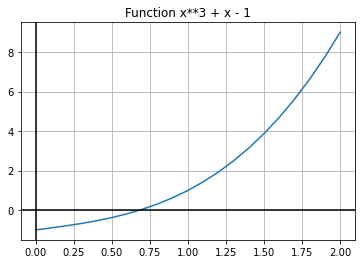

Precision Lagrange :  [0.0, 0.2, 0.34558823529411764, 0.451108650544788, 0.5259714774368877, 0.5778820411349672, 0.6131895581061645, 0.6368553082754008, 0.6525524631781211, 0.6628890098983218, 0.6696623621980873]
Precision Newton :  [2.0, 1.3076923076923077, 0.8927086427086427, 0.7145394009921394, 0.6831931387085868, 0.6823284429617509]


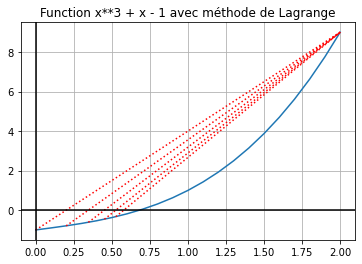

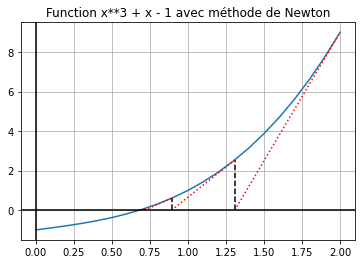

In [23]:
f1 = x**3 + x - 1
ex(f1, 0, 2, 0.01)

##### Fonction 2 : x - exp(-x)



Fonction : x - exp(-x)
Solution : [0.567143290409784]


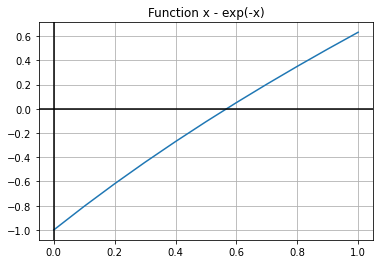

Precision Lagrange :  [1.0, 0.6126998367802821, 0.5721814120905075, 0.567703214235785]
Precision Newton :  [1.0, 0.5378828427399902, 0.5669869914054132, 0.567143285989123]


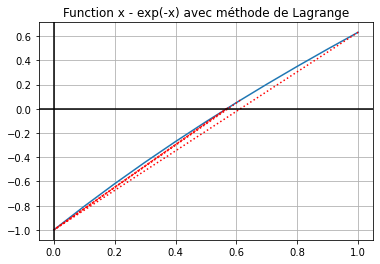

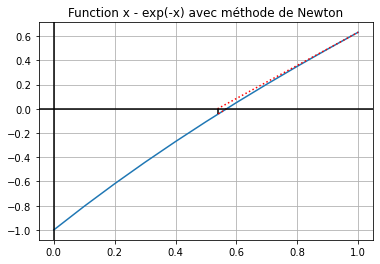

In [26]:
f2 = x - exp(-x)
ex(f2, 0, 1, 0.01)

##### Fonction 3 : 1 - x**2


Fonction : 1 - x**2
Solution : [-1.00000000000000, 1.00000000000000]


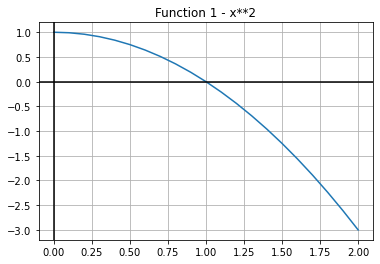

Precision Lagrange :  [0.0, 0.5, 0.8, 0.9285714285714286, 0.975609756097561, 0.9918032786885246, 0.9972602739726028]
Precision Newton :  [2.0, 1.25, 1.025, 1.0003048780487804, 1.0000000464611474]


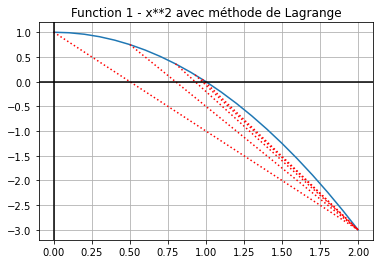

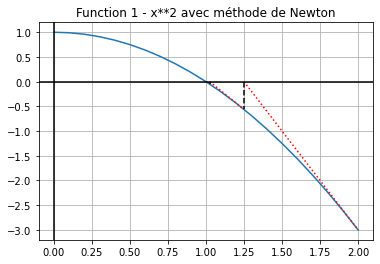

In [25]:
f3 = 1 - x**2
ex(f3, 0, 2, 0.01)

# 6. Méthode pour découper toute application f en fonction de sa monotonie stricte et convexité

In [27]:
def monotonie_intervalle(f, start, end):
    """Retourne une liste d'intervalle croissant ou décroissant"""
    croissant = []
    decroissant = []
    tab = np.arange(start, end + pas, pas)
    derivee = [eval(d(f), t) for t in tab if eval(d(f), t).is_real]
    check = [element >= 0 for element in derivee]
    i = 0
    while i < len(derivee):
        croiss = []
        decroiss = []
        while i < len(check) and check[i]:
            if (len(croiss) == 0):
                croiss.append(tab[i])
            i += 1
        if (len(croiss) == 1):
            croiss.append(tab[i - 1])
        
        while i < len(check) and not check[i]:
            if (len(decroiss) == 0):
                decroiss.append(tab[i])
            i += 1
        if (len(decroiss) == 1):
            decroiss.append(tab[i - 1])
        if len(decroiss) == 2:
            decroissant.append(decroiss)
        if len(croiss) == 2:
            croissant.append(croiss)
        i += 1
    return croissant, decroissant

In [28]:
def convexite_intervalle(f, start, end):
    """Retourne une liste d'intervalle convexe ou concave"""
    return monotonie_intervalle(d(f), start, end)

In [29]:
def onlyNewton(f, start, end, erreur):
    print("Fonction :", f)
    print("Solution :", [item.evalf() for item in solve(f, x) if item.is_real])

    pt_f_N, precision_N  = newton(f, start, end, erreur)

    print("Precision Newton : ", [float(item) for item in precision_N])
    tracer_corde_newton(f, start, end, (pt_f_N, precision_N))
    print()

##### Test sur la fonction 4 : x**3 - 2 * x + 3

Intervalle croissant :  [[-50.0, -0.8999999999993022], [1.0000000000007248, 50.00000000000142]]
Intervalle décroissant :  [[-0.7999999999993008, 0.8000000000007219]]
Intervalle convexe :  [[0.10000000000071196, 50.00000000000142]]
Intervalle concave :  [[-50.0, -0.09999999999929088]]


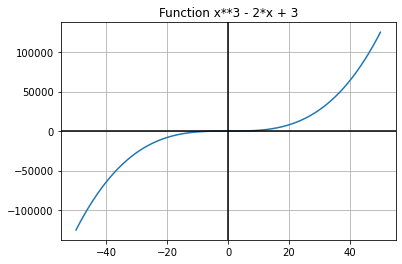

Fonction : x**3 - 2*x + 3
Solution : [-1.89328919630450]
Precision Newton :  [-1.0, -5.0, -3.4657534246575343, -2.5344233133435603, -2.0589998112539365, -1.9086897609579583, -1.8934408815493318]


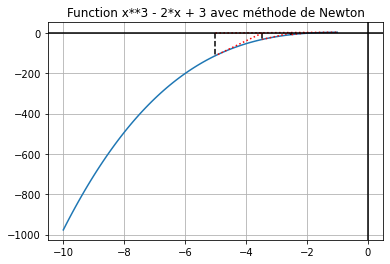

In [30]:
f4 = x**3 - 2 * x + 3
croissant, decroissant = monotonie_intervalle(f4, -50, 50)
convexe, concave = convexite_intervalle(f4, -50, 50)
print("Intervalle croissant : ", croissant)
print("Intervalle décroissant : ", decroissant)
print("Intervalle convexe : ", convexe)
print("Intervalle concave : ", concave)
tracer(f4, -50, 50)
onlyNewton(f4, -10, -1, 0.1)